In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

for $t=1,\dots,T$
* play $x_t$
* a loss $\ell_t(x) = |x-y_t|$ is revealed where $y_t\in[a,b]$
* set $x_{t+1} = \text{Proj}_{[a,b]}(x_t-\eta_t g_t)$

In [30]:
a = 0.1
b = 1.1
T = 200_000
time_steps = np.arange(1,T+1)
targets = 0.1+np.mod(time_steps,2)#*scipy.stats.uniform.rvs(loc=a,scale=b-a,size=T)

best_constant_in_hindsight = np.array(pd.Series(targets).expanding().median())

learning_rates_dict = {
    "zero_learning_rate" : np.zeros(T),
    "optimal_decreasing_learning_rates": (b-a)/np.sqrt(2*time_steps),
    #"optimal_constant_learning_rates": (b-a)/np.sqrt(T)*np.ones(T),
    #"constant + noise": (b-a)/np.sqrt(T) + scipy.stats.uniform.rvs(loc=-(b-a)/np.sqrt(T), scale=2*(b-a)/np.sqrt(T), size=T),
    "1/sqrt(t) * mod 2": (b-a)/np.sqrt(2*time_steps) * (1+np.mod(time_steps,10)) ,
    "1/sqrt(t) * bernoulli p=0.1": (b-a)/np.sqrt(2*time_steps) * (1+scipy.stats.bernoulli.rvs(p=0.1,size=T)),
    "a/sqrt(t)" : a/(np.sqrt(2*time_steps)),
    "min targets" : np.array(pd.Series(targets).expanding().min())/(np.sqrt(2*time_steps)),
    "1/t" : (b-a)/time_steps,
    "1/sqrt(T)" : (b-a)/np.sqrt(T) * np.ones(T)
}
instantaneous_losses_dict = {}

In [31]:
for name, learning_rate in learning_rates_dict.items() :
    xt = a # initial point
    instantaneous_losses_dict[name] = np.zeros(T)

    for t in time_steps :
        lt = np.abs(xt-targets[t-1])
        gt = 1 if xt >= targets[t-1] else -1
        xt = np.clip(xt-learning_rate[t-1]*gt,a,b)

        instantaneous_losses_dict[name][t-1] = lt

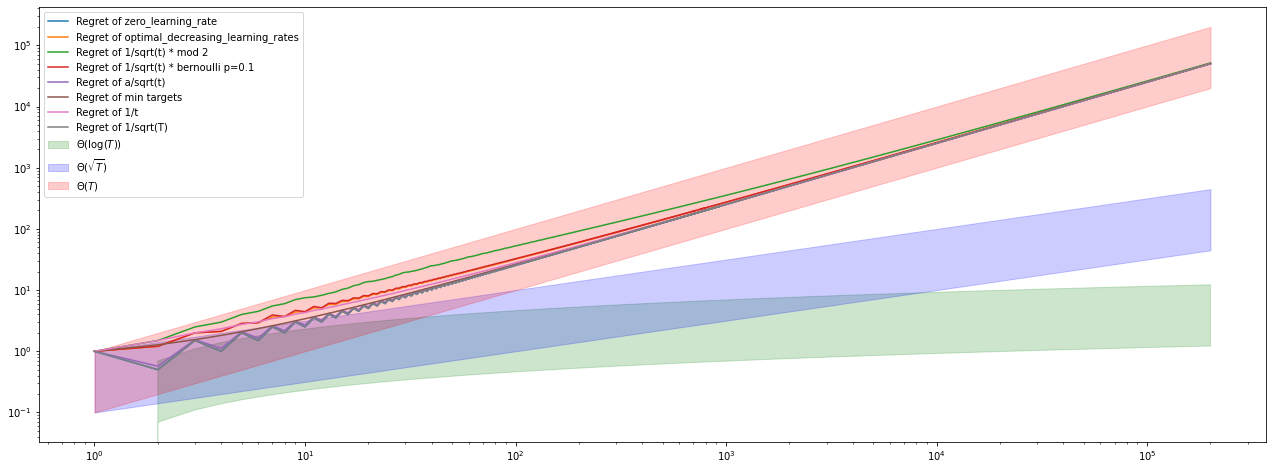

In [33]:
plt.figure(figsize=(22,8))

for name, instantaneous_loss in instantaneous_losses_dict.items() :
    plt.loglog(time_steps, np.cumsum(instantaneous_loss - np.abs(targets-best_constant_in_hindsight)), label="Regret of "+name)

plt.fill_between(time_steps, 0.1*(b-a)*1*np.log(time_steps), (b-a)*1*np.log(time_steps),alpha=0.2,color="green",label=r"$\Theta(\log(T))$")
plt.fill_between(time_steps, 0.1*(b-a)*1*np.sqrt(time_steps), (b-a)*1*np.sqrt(time_steps),alpha=0.2,color="b",label=r"$\Theta(\sqrt{T})$")
plt.fill_between(time_steps, 0.1*(b-a)*1*time_steps, (b-a)*1*time_steps, alpha=0.2,color="red",label=r"$\Theta(T)$")


plt.legend()
plt.show()